In [1]:
import requests,json,os,time
import random,pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx
import geojson
import ndjson
apiKey=os.getenv('CKANAPIKEY')
if apiKey is None:
    raise EnvironmentError("Failed because {} is not set.".format('CKANAPIKEY'))

In [2]:
# print(pd.__version__)

In [3]:
mainDir = '/Users/iperezx/Documents/sage-commons/sage-commons/'
# sageCommonsURL='http://127.0.0.1:5000'
# sageCommonsURL='http://hotshot.sdsc.edu:5000'
sageCommonsURL='https://sage-commons.sdsc.edu'
headers = {'Authorization': apiKey}
orgName= 'sage'

### get node and plugin data from endpoint

In [4]:
nodeURL = 'https://sage-data-api.nautilus.optiputer.net/api/v1/nodes-wild-data'
response = requests.request("GET", nodeURL)
nodeJSON = response.json()

In [5]:
nodeDataDF = pd.DataFrame.from_dict(nodeJSON['data'], orient='columns')
nodeDataDF['lon'] = pd.to_numeric(nodeDataDF['lon'],errors='coerce')
nodeDataDF['lat'] = pd.to_numeric(nodeDataDF['lat'],errors='coerce')
nodeDataDF.rename(columns={'id':'nodeID'},inplace=True)
nodeDataDF.nodeID = nodeDataDF.nodeID.str.lower()

geometry = [Point(xy) for xy in zip(nodeDataDF.lon, nodeDataDF.lat)]
nodeDataGDF = gpd.GeoDataFrame(nodeDataDF.drop(['lon', 'lat'], axis=1), crs="EPSG:4326", geometry=geometry)
exceptColmns = ['nodeID','geometry']
suffix = '_node'
nodeDataGDF.columns = nodeDataGDF.columns.map(lambda x : x+suffix if x not in exceptColmns else x)
nodeDataGDF

,name_node,nodeID,vsn_node,geometry
0,SAGE-?,000048b02d15bc77,W021,POINT (-87.97216 41.72586)
1,SAGE-?,000048b02d15bdc7,W020,POINT (-87.97216 41.72586)
2,DAWN-ANL,000048b02d15bda5,W022,POINT (-87.97216 41.72586)
3,DAWN-LBNL,000048b02d15c31a,W01A,POINT (-87.97216 41.72586)
4,DAWN-ANL,000048b02d15c31f,W01C,POINT (-87.97216 41.72586)
5,DAWN-LBNL,000048b02d15bc6d,W01B,POINT (-87.97216 41.72586)
6,SAGE-?,000048b02d15bc42,W01D,POINT (-87.97216 41.72586)
7,ARM,000048b02d15c328,W016,POINT (-105.24585 40.01631)
8,ARM,000048b02d15bc72,W018,POINT (-105.24585 40.01631)
9,ARM,000048b02d15bc4c,W017,POINT (-105.24585 40.01631)


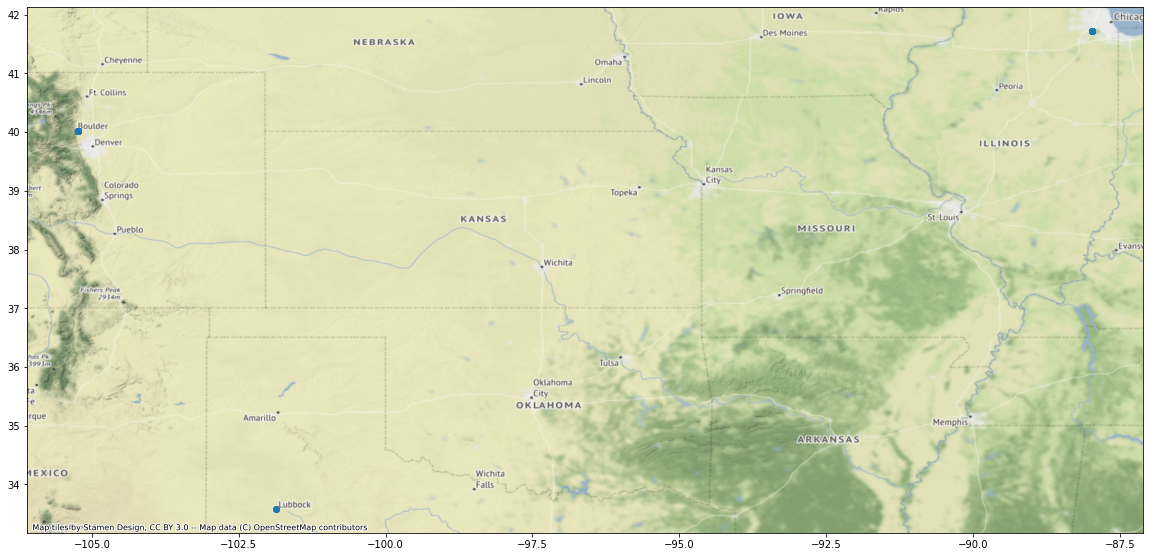

In [6]:
ax = nodeDataGDF.plot(figsize=(20, 10))
ctx.add_basemap(ax,crs=nodeDataGDF.crs.to_string())

In [7]:
pluginURL = 'https://sdr.sagecontinuum.org/api/v1/query'
querySDR = {"start": "-1m",
           "tail": 1,
            "filter": {
                "plugin": "plugin-metsense:0.1.1"
            }
          }

response = requests.request("GET", pluginURL,json=querySDR,verify=False)
pluginJSON = response.json(cls=ndjson.Decoder)

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:842: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn((


In [8]:
pluginJSON

[{'timestamp': '2021-07-22T14:49:35.535883862Z',
  'name': 'iio.in_humidityrelative_input',
  'value': 50.978,
  'meta': {'node': '000048b02d15bc77',
   'plugin': 'plugin-metsense:0.1.1',
   'sensor': 'bme680'}},
 {'timestamp': '2021-07-22T14:49:40.073823053Z',
  'name': 'iio.in_humidityrelative_input',
  'value': 58.902,
  'meta': {'node': '000048b02d15c319',
   'plugin': 'plugin-metsense:0.1.1',
   'sensor': 'bme680'}},
 {'timestamp': '2021-07-22T14:49:49.12207699Z',
  'name': 'iio.in_humidityrelative_input',
  'value': 26.957,
  'meta': {'node': '000048b02d15c328',
   'plugin': 'plugin-metsense:0.1.1',
   'sensor': 'bme680'}},
 {'timestamp': '2021-07-22T14:49:35.533680084Z',
  'name': 'iio.in_pressure_input',
  'value': 983.41,
  'meta': {'node': '000048b02d15bc77',
   'plugin': 'plugin-metsense:0.1.1',
   'sensor': 'bme680'}},
 {'timestamp': '2021-07-22T14:49:40.071679378Z',
  'name': 'iio.in_pressure_input',
  'value': 997.55,
  'meta': {'node': '000048b02d15c319',
   'plugin': 'p

In [19]:
pluginDataDF = pd.DataFrame(pluginJSON)
pluginDataDF['timestamp'] = pd.to_datetime(pluginDataDF['timestamp'])
pluginDataDF = pluginDataDF.drop('meta',1).join(pd.DataFrame.from_dict(pluginDataDF.meta.to_dict(),orient='index'))
exceptColmns = ['node','plugin','sensor']
suffix = '_sdr'
pluginDataDF.columns = pluginDataDF.columns.map(lambda x : x+suffix if x not in exceptColmns else x)
pluginDataDF.rename(columns={'node':'nodeID','plugin':'pluginID'},inplace=True)
pluginDataDF[['pluginID', 'pluginVersion_sdr']] = pluginDataDF['pluginID'].str.split(':', 1, expand=True)
pluginDataDF.pluginID = pluginDataDF.pluginID.str.split('-')
pluginDataDF.pluginID = pluginDataDF.pluginID.str.get(1)
pluginDataDF

,timestamp_sdr,name_sdr,value_sdr,nodeID,pluginID,sensor,pluginVersion_sdr
0,2021-07-22 14:49:35.535883862+00:00,iio.in_humidityrelative_input,50.978,000048b02d15bc77,metsense,bme680,0.1.1
1,2021-07-22 14:49:40.073823053+00:00,iio.in_humidityrelative_input,58.902,000048b02d15c319,metsense,bme680,0.1.1
2,2021-07-22 14:49:49.122076990+00:00,iio.in_humidityrelative_input,26.957,000048b02d15c328,metsense,bme680,0.1.1
3,2021-07-22 14:49:35.533680084+00:00,iio.in_pressure_input,983.410,000048b02d15bc77,metsense,bme680,0.1.1
4,2021-07-22 14:49:40.071679378+00:00,iio.in_pressure_input,997.550,000048b02d15c319,metsense,bme680,0.1.1
5,2021-07-22 14:49:49.118864754+00:00,iio.in_pressure_input,989.020,000048b02d15c328,metsense,bme680,0.1.1
6,2021-07-22 14:49:35.529750843+00:00,iio.in_resistance_input,99466.000,000048b02d15bc77,metsense,bme680,0.1.1
7,2021-07-22 14:49:40.067432158+00:00,iio.in_resistance_input,138201.000,000048b02d15c319,metsense,bme680,0.1.1
8,2021-07-22 14:49:49.114367979+00:00,iio.in_resistance_input,111681.000,000048b02d15c328,metsense,bme680,0.1.1
9,2021-07-22 14:49:35.531583584+00:00,iio.in_temp_input,29080.000,000048b02d15bc77,metsense,bme680,0.1.1


In [10]:
pluginDataDF.nodeID.unique()

array(['000048b02d15bc77', '000048b02d15c319', '000048b02d15c328'],
      dtype=object)

In [11]:
# merge node data and plugin data
#pluginDataDF
combinedData = pluginDataDF.merge(nodeDataGDF, how='inner', on='nodeID')
combinedData

,timestamp_sdr,name_sdr,value_sdr,nodeID,pluginID,sensor,name_node,vsn_node,geometry
0,2021-07-22 14:49:35.535883862+00:00,iio.in_humidityrelative_input,50.978,000048b02d15bc77,metsense,bme680,SAGE-?,W021,POINT (-87.97216 41.72586)
1,2021-07-22 14:49:35.533680084+00:00,iio.in_pressure_input,983.410,000048b02d15bc77,metsense,bme680,SAGE-?,W021,POINT (-87.97216 41.72586)
2,2021-07-22 14:49:35.529750843+00:00,iio.in_resistance_input,99466.000,000048b02d15bc77,metsense,bme680,SAGE-?,W021,POINT (-87.97216 41.72586)
3,2021-07-22 14:49:35.531583584+00:00,iio.in_temp_input,29080.000,000048b02d15bc77,metsense,bme680,SAGE-?,W021,POINT (-87.97216 41.72586)
4,2021-07-22 14:49:40.073823053+00:00,iio.in_humidityrelative_input,58.902,000048b02d15c319,metsense,bme680,SAGE-AOT,W015,POINT (-87.97216 41.72586)
5,2021-07-22 14:49:40.071679378+00:00,iio.in_pressure_input,997.550,000048b02d15c319,metsense,bme680,SAGE-AOT,W015,POINT (-87.97216 41.72586)
6,2021-07-22 14:49:40.067432158+00:00,iio.in_resistance_input,138201.000,000048b02d15c319,metsense,bme680,SAGE-AOT,W015,POINT (-87.97216 41.72586)
7,2021-07-22 14:49:40.069430447+00:00,iio.in_temp_input,27220.000,000048b02d15c319,metsense,bme680,SAGE-AOT,W015,POINT (-87.97216 41.72586)
8,2021-07-22 14:49:49.122076990+00:00,iio.in_humidityrelative_input,26.957,000048b02d15c328,metsense,bme680,ARM,W016,POINT (-105.24585 40.01631)
9,2021-07-22 14:49:49.118864754+00:00,iio.in_pressure_input,989.020,000048b02d15c328,metsense,bme680,ARM,W016,POINT (-105.24585 40.01631)


In [12]:
combinedData.nodeID.unique()

array(['000048b02d15bc77', '000048b02d15c319', '000048b02d15c328'],
      dtype=object)

In [13]:
# get sensor hardware
sensorHardwareURL = 'https://sage-data-api.nautilus.optiputer.net/api/v1/sensor-hardware-data'

response = requests.request("GET", sensorHardwareURL)
sensorHardwareJSON = response.json()
# print(sensorHardwareJSON['data'])

sensorHardwareDF = pd.DataFrame.from_dict(sensorHardwareJSON['data'], orient='columns')

exceptColmns = ['product_name']
suffix = '_sensor'
sensorHardwareDF.columns = sensorHardwareDF.columns.map(lambda x : x+suffix if x not in exceptColmns else x)
sensorHardwareDF.rename(columns={'product_name':'sensor'},inplace=True)
sensorHardwareDF

,id_sensor,sensor,manufacture_sensor,sensor_types_sensor,link_sensor
0,000000000,bme680,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...
1,000000001,rg-15,Hydreon Corporation,rainfall measuring device,https://rainsensors.com/products/rg-15/
2,000000002,bme280,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...
3,000000003,xnv-8081z,Hanwha Techwin America,camera,https://www.hanwhasecurity.com/xnv-8081z.html
4,000000004,xnf-8010rv,Hanwha Techwin America,camera,https://www.hanwhasecurity.com/xnf-8010rv.html
5,000000005,xnv-8080r,Hanwha Techwin America,camera,https://www.hanwhasecurity.com/xnv-8080r.html
6,000000006,xnv-8082r,Hanwha Techwin America,camera,https://www.hanwhasecurity.com/xnv-8082r.html


In [14]:
#merge sensor hardware data with pluginData
combinedData = combinedData.merge(sensorHardwareDF, how='inner', on='sensor')
combinedData

,timestamp_sdr,name_sdr,value_sdr,nodeID,pluginID,sensor,name_node,vsn_node,geometry,id_sensor,manufacture_sensor,sensor_types_sensor,link_sensor
0,2021-07-22 14:49:35.535883862+00:00,iio.in_humidityrelative_input,50.978,000048b02d15bc77,metsense,bme680,SAGE-?,W021,POINT (-87.97216 41.72586),000000000,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...
1,2021-07-22 14:49:35.533680084+00:00,iio.in_pressure_input,983.410,000048b02d15bc77,metsense,bme680,SAGE-?,W021,POINT (-87.97216 41.72586),000000000,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...
2,2021-07-22 14:49:35.529750843+00:00,iio.in_resistance_input,99466.000,000048b02d15bc77,metsense,bme680,SAGE-?,W021,POINT (-87.97216 41.72586),000000000,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...
3,2021-07-22 14:49:35.531583584+00:00,iio.in_temp_input,29080.000,000048b02d15bc77,metsense,bme680,SAGE-?,W021,POINT (-87.97216 41.72586),000000000,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...
4,2021-07-22 14:49:40.073823053+00:00,iio.in_humidityrelative_input,58.902,000048b02d15c319,metsense,bme680,SAGE-AOT,W015,POINT (-87.97216 41.72586),000000000,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...
5,2021-07-22 14:49:40.071679378+00:00,iio.in_pressure_input,997.550,000048b02d15c319,metsense,bme680,SAGE-AOT,W015,POINT (-87.97216 41.72586),000000000,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...
6,2021-07-22 14:49:40.067432158+00:00,iio.in_resistance_input,138201.000,000048b02d15c319,metsense,bme680,SAGE-AOT,W015,POINT (-87.97216 41.72586),000000000,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...
7,2021-07-22 14:49:40.069430447+00:00,iio.in_temp_input,27220.000,000048b02d15c319,metsense,bme680,SAGE-AOT,W015,POINT (-87.97216 41.72586),000000000,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...
8,2021-07-22 14:49:49.122076990+00:00,iio.in_humidityrelative_input,26.957,000048b02d15c328,metsense,bme680,ARM,W016,POINT (-105.24585 40.01631),000000000,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...
9,2021-07-22 14:49:49.118864754+00:00,iio.in_pressure_input,989.020,000048b02d15c328,metsense,bme680,ARM,W016,POINT (-105.24585 40.01631),000000000,Bosch Sensortec,"relative humidity,barometric pressure,ambient ...",https://www.bosch-sensortec.com/products/envir...


In [ ]:
# merge with ECR
ecrAppEndpoint = 'https://ecr.sagecontinuum.org/api/apps'
ecrPortalEndpoint = 'https://portal.sagecontinuum.org/apps/app/'
response = requests.request("GET", ecrAppEndpoint)
ecrJson = response.json()
ecrDataDf = pd.DataFrame.from_dict(ecrJson['data'], orient='columns')
ecrDataDf.drop('source',1).join(pd.DataFrame.from_dict(ecrDataDf.source.to_dict(),orient='index'))
exceptColmns = ['name']
suffix = '_ecr'
ecrDataDf.columns = ecrDataDf.columns.map(lambda x : x+suffix if x not in exceptColmns else x)
ecrDataDf.rename(columns={'name':'pluginID'},inplace=True)
ecrDataDf['app_endpoint_ecr'] = ecrPortalEndpoint + ecrDataDf.namespace_ecr + '/' + ecrDataDf.pluginID
ecrDataDf

In [ ]:
combinedData = combinedData.merge(ecrDataDf, how='inner', on='pluginID')
combinedData

### create data resource

In [ ]:
# get metadata from this plugin
sensors = combinedData.sensor_types_sensor.unique()[0].split(",")
pluginName = combinedData.pluginID.unique()[0]
pluginVersion = combinedData.version_ecr.unique()[0] # will only return one
print('pluginName: ' + pluginName)
print('pluginVersion: ' + pluginVersion)
print( 'sensor: ' + str(sensors))

In [ ]:
# create geoJson from geometry unique Values
combinedData.geometry.unique()
multiPointVals = [(p.x,p.y) for p in combinedData.geometry.unique()]
print(multiPointVals)
geoJsonMultiPoints = geojson.MultiPoint(multiPointVals)
print(geoJsonMultiPoints)

In [ ]:
apiAction='/api/3/action/package_create'
url = sageCommonsURL+apiAction
title = pluginName + str(random.randint(1, 1e4))
ecrEndpoint = combinedData.app_endpoint_ecr.unique()[0]
name = title
spatialVal = geoJsonMultiPoints

extras = [{'key': "spatial",'value': json.dumps(spatialVal) },
          {'key': "ecr_plugin_url",'value': ecrEndpoint }
         ]
tags = [{'name':'plugin'}]

datasetDescription = combinedData.description_ecr.unique()[0]

for x in sensors:
    tags.append({'name': x})

payload = {'owner_org': orgName,
           'title': title,
           'name' : name,
           'notes': datasetDescription,
           'tags' : tags,
           'extras': extras
           
          }

In [ ]:
tags

In [ ]:
response = requests.request("POST", url, headers=headers, json = payload)
jsonResponseDS = response.json()
print(response)
print(json.dumps(jsonResponseDS, indent=4, sort_keys=True))

### create data source

In [ ]:
apiAction='/api/3/action/sagecommons_create'
packageID = jsonResponseDS['result']['id']
url = sageCommonsURL+apiAction

resourceName = pluginName
resourceDescription = combinedData.description_ecr.unique()[0]
dataURL = pluginURL


resource = {'package_id': packageID,
            'name' : resourceName,
            'description': resourceDescription,
            'url': dataURL,
            'format':'JSON',
            'query':querySDR,
           }


payload = {'resource': resource,
          }

# start = time.time() # start timing
response = requests.request("POST", url, headers=headers, json = payload)
# end = time.time()
# elapseTime = abs(end-start)
# print('Elapsed time: ' + str(elapseTime))

In [ ]:
jsonResponse = response.json()
print(response)
print(response.text)
print(json.dumps(jsonResponse, indent=4, sort_keys=True))

In [ ]:
apiAction='/api/3/action/resource_view_list'
resourceID = jsonResponse['result']['resource_id']
url = sageCommonsURL+apiAction


payload = {'id': resourceID,
          }

response = requests.request("GET", url, headers=headers, json = payload)
jsonResponse = response.json()
print(json.dumps(jsonResponse, indent=4, sort_keys=True))

In [ ]:
jsonResponse['result'][0]['id']

In [ ]:
apiAction='/api/3/action/resource_view_delete'
viewID = jsonResponse['result'][0]['id']
url = sageCommonsURL+apiAction


payload = {'id': viewID,
          }

response = requests.request("POST", url, headers=headers, json = payload)
jsonResponse = response.json()
print(json.dumps(jsonResponse, indent=4, sort_keys=True))